**Problem** : **3**

In [337]:
import warnings
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report


Demonstrates an self training technique to learn handwritten digits using label propagation

We start by training a label propagation model with only 10 labeled points, then we select the top five most uncertain points to label. Next, we train with 15 labeled points. We repeat this process four times to have a model trained with 30 labeled examples. Note you can increase this to label more than 30 by changing max_iterations. Labeling more than 30 can be useful to get a sense for the speed of convergence of this self training technique.

A function which projects a vector into some higher dimensional space. This
  implementation supports RBF and KNN kernels. Using the RBF kernel generates
  a dense matrix of size O(N^2). KNN kernel will generate a sparse matrix of
  size O(k*N) which will run much faster. See the documentation for SVMs for
  more info on kernels.

As the sample code mentioned in the question, we can use that code to implement the Label Propagation with Self-Training.

In [338]:
digits = datasets.load_digits()
rng = np.random.RandomState(0)
indices = np.arange(len(digits.data)) 
rng.shuffle(indices)
X = digits.data[indices[:330]]
y = digits.target[indices[:330]] 
images = digits.images[indices[:330]]

In [339]:
def Labelspreadingalgo(X, y):  #defining the function for the Labelspreadingalgorithm
    alphadecay = 0.8           # Intialiazing the parameters as question mentioned alphadecay must be 0.8
    contol=0.001
    maximumiterations=150
    y = np.asarray(y)
    unlabeled = y == -1 #boolean array containning all the unlabled nodes
    n_samples=len(y)           #n_samples nothing but the number samples given for the raw data.
    matgraph = kneighbors_graph(X, 6,include_self='auto') #Creating a graph matrix using the Kneighborsgraph which will used for the label distriubution.
    catdis = np.unique(y)
    catdis = catdis[catdis != -1]
    no_of_classifications = len(catdis)
    befores = np.zeros((X.shape[0], no_of_classifications)) #Label propagation for the process
    ldis = np.zeros((n_samples, no_of_classifications)) #Staring the label distribution process as below
    for i in catdis:
        ldis[y == i, catdis == i] = 1
    ps = np.copy(ldis)
    unlabeled = unlabeled[:, np.newaxis] # To track the labeled and unlabelled nodes 
    for n in range(maximumiterations):
        sub=np.abs(ldis - befores).sum()
        if sub < contol:
            break
        befores = ldis
        mul1=matgraph @ ldis
        ldis = mul1        
        li = np.sum(ldis, axis=1)[:, np.newaxis]
        li[li == 0] = 1
        ldis =ldis/li
        ldis = np.where(unlabeled, ldis, ps)
    unlabellednodes=catdis[np.argmax(ldis, axis=1)] # unlabelled nodes
    return unlabellednodes,catdis,ldis  

In [340]:
tot = len(y) #getting the toatal value for the targeted values.
n = 10 #assigning the 10 label points for label propagation
unlabeled_set = np.arange(tot)[n:]

In [341]:
def labelpropagation(n):  #we are defining the fucntion to load the digitsdataset 
    ys = np.copy(y)
    indices = np.arange(tot)
    nola = indices[n:]
    ys[nola] = -1
    unlabellednodes,labels,ldis=Labelspreadingalgo(X, ys)
    plabs = unlabellednodes[unlabeled_set] #Predicted labels from the learnet model
    tlabs = y[unlabeled_set] #True lables of the unlabelled set
    warnings.filterwarnings('ignore') 
    acc = classification_report(tlabs, plabs) #getting the report which consist of accauracy, precsion,recall,f1-score,support
    accuarcy=accuracy_score(tlabs,plabs) #getting the accuarcy scores
    print('The Accuarcy Score of the model is: \n',accuarcy) #priniting the accuarcy score
    print(' ')
    confusionmatrix = confusion_matrix(tlabs, plabs) #getting the confusion matrix
    print("Accuracy of the model:\n",acc) #printing the entire report to get the accuarcy.
    print(' ')
    print("Confusion matrix of the model:\n",confusionmatrix) #printing the confusion matrix
    prentr = stats.distributions.entropy(ldis.T) #compute the entropies of transduced label distributions
    ui = np.argsort(prentr)[:5] # select up to 5 digit examples that the classifier is most uncertain about
    plotfigure = plt.figure(figsize=(7, 7)) #plotting the figure and storing it
    for i, j in enumerate(ui):
      pc = images[j] #storing the images for the comparsions
      pltfigure = plotfigure.add_subplot(3, 4, i + 3)
      pltfigure.imshow(pc) #plotting the images
      pltfigure.set_title('TrueValue: %i\nPredictValue: %i' % (y[j], unlabellednodes[j])) #setting up the title and comapring the Actual value with the estimated value
    plt.show()

Calling the above function with only 10 labeled points, And also getting the Accuarcy score , report and confusion matrix with the images of the digits data.

The number of Label points are: 10
 
The Accuarcy Score of the model is: 
 0.48125
 
Accuracy of the model:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        29
           2       0.78      0.94      0.85        31
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        27
           5       0.82      0.40      0.54        35
           6       0.62      1.00      0.76        40
           7       0.44      1.00      0.62        36
           8       0.34      0.97      0.51        33
           9       1.00      0.08      0.15        37

    accuracy                           0.48       320
   macro avg       0.40      0.44      0.34       320
weighted avg       0.44      0.48      0.38       320

 
Confusion matrix of the model:
 [[ 0 24  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0 13 11  0]
 [ 0  0 29  0  0  0  0  2  0  0]

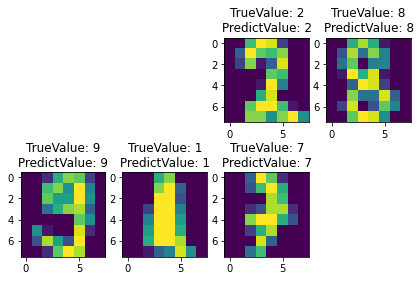

In [342]:
n = 10
print('The number of Label points are:',n)
print(' ')
unlabeled_set = np.arange(tot)[n:]
labelpropagation(10)

Calling the above function with the above 10 labeled points plus 5 new labled points, And also getting the Accuarcy score , report and confusion matrix with the images of the digits data.

The number of Label points are: 15
 
The Accuarcy Score of the model is: 
 0.473015873015873
 
Accuracy of the model:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        29
           2       0.78      0.93      0.85        30
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        27
           5       0.82      0.40      0.54        35
           6       0.60      1.00      0.75        37
           7       0.44      1.00      0.62        36
           8       0.34      0.97      0.50        32
           9       1.00      0.08      0.15        37

    accuracy                           0.47       315
   macro avg       0.40      0.44      0.34       315
weighted avg       0.44      0.47      0.37       315

 
Confusion matrix of the model:
 [[ 0 24  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0 13 11  0]
 [ 0  0 28  0  0  0  0

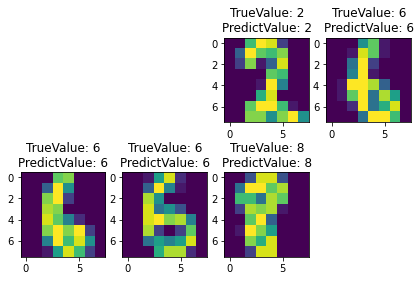

In [343]:
n = 15
print('The number of Label points are:',n)
print(' ')
unlabeled_set = np.arange(tot)[n:]
labelpropagation(15)

Calling the above function with the above 15 labeled points plus 5 new labled points, And also getting the Accuarcy score , report and confusion matrix with the images of the digits data.

The number of Label points are: 20
 
The Accuarcy Score of the model is: 
 0.6161290322580645
 
Accuracy of the model:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       0.86      0.43      0.57        28
           2       0.78      0.93      0.85        30
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        27
           5       0.89      0.71      0.79        34
           6       0.37      1.00      0.54        36
           7       0.55      1.00      0.71        36
           8       0.70      0.97      0.81        31
           9       1.00      0.05      0.10        37

    accuracy                           0.62       310
   macro avg       0.61      0.61      0.53       310
weighted avg       0.62      0.62      0.53       310

 
Confusion matrix of the model:
 [[23  0  0  0  0  0  0  0  0  0]
 [ 0 12  5  0  0  0  0  0 11  0]
 [ 0  0 28  0  0  0  

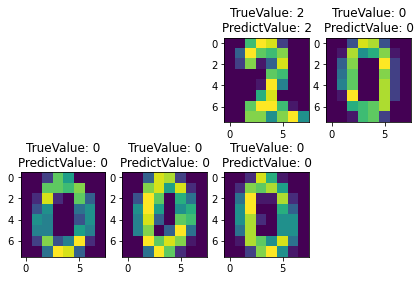

In [344]:
n = 20
print('The number of Label points are:',n)
print(' ')
unlabeled_set = np.arange(tot)[n:]
labelpropagation(20)

Calling the above function with the above 20 labeled points plus 5 new labled points, And also getting the Accuarcy score , report and confusion matrix with the images of the digits data.

The number of Label points are: 25
 
The Accuarcy Score of the model is: 
 0.6918032786885245
 
Accuracy of the model:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       0.86      0.43      0.57        28
           2       0.82      0.93      0.87        30
           3       0.00      0.00      0.00        28
           4       1.00      0.96      0.98        26
           5       0.92      0.71      0.80        34
           6       0.97      1.00      0.99        36
           7       0.87      1.00      0.93        34
           8       0.27      0.97      0.42        29
           9       1.00      0.03      0.05        37

    accuracy                           0.69       305
   macro avg       0.77      0.70      0.66       305
weighted avg       0.78      0.69      0.65       305

 
Confusion matrix of the model:
 [[23  0  0  0  0  0  0  0  0  0]
 [ 0 12  5  0  0  0  0  0 11  0]
 [ 0  0 28  0  0  0  

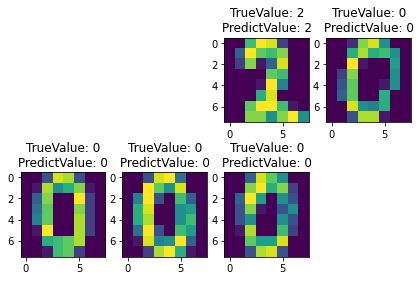

In [345]:
n = 25
print('The number of Label points are:',n)
print(' ')
unlabeled_set = np.arange(tot)[n:]
labelpropagation(25)

Calling the above function with the above 25 labeled points plus 5 new labled points, And also getting the Accuarcy score , report and confusion matrix with the images of the digits data.

The number of Label points are: 30
 
The Accuarcy Score of the model is: 
 0.7866666666666666
 
Accuracy of the model:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       0.86      0.43      0.57        28
           2       0.82      0.93      0.87        29
           3       0.00      0.00      0.00        28
           4       1.00      0.96      0.98        25
           5       0.92      0.70      0.79        33
           6       0.97      1.00      0.99        36
           7       0.89      1.00      0.94        34
           8       0.42      0.97      0.59        29
           9       0.74      0.83      0.78        35

    accuracy                           0.79       300
   macro avg       0.76      0.78      0.75       300
weighted avg       0.76      0.79      0.76       300

 
Confusion matrix of the model:
 [[23  0  0  0  0  0  0  0  0  0]
 [ 0 12  5  0  0  0  0  0 11  0]
 [ 0  0 27  0  0  0  

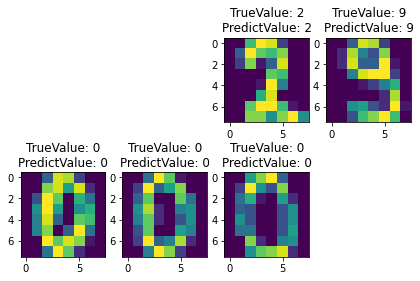

In [346]:
n = 30
print('The number of Label points are:',n)
print(' ')
unlabeled_set = np.arange(tot)[n:]
labelpropagation(30)